# Name: Rushikesh Jyoti
# Division: A
# Roll no: 27
# SRN: 201901139

Question: Use  the  TITANIC  dataset  given  for  building a  classificaion tree  prediction model.

In [2]:
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plot

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('./titanic_data-F.csv', na_values='?')

print(df.columns)
df.head()

Index(['x', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')


,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## Checking for NA Values

In [4]:
df.isna().sum()

x               0
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
home.dest     564
dtype: int64

We have lots of NA values :O

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

x            0
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

~~No NAs?~~

In [7]:
df.dtypes

x              int64
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

## Drop uneccesary columns

In [8]:
df.drop(["x", "name", "home.dest", "ticket"], axis=1, inplace=True)

## Encoding categorical data

In [9]:
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df["cabin"] = LabelEncoder().fit_transform(df["cabin"])
df["embarked"] = LabelEncoder().fit_transform(df["embarked"])

df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.0000,0,0,211.3375,37,2
1,1,1,1,0.9167,1,2,151.5500,63,2
2,1,0,0,2.0000,1,2,151.5500,63,2
3,1,0,1,30.0000,1,2,151.5500,63,2
4,1,0,0,25.0000,1,2,151.5500,63,2


## Correlation Heatmap

In [10]:
# sb.set({'font_scale': 1.6})
sb.set(font_scale=1.6)

<AxesSubplot:>

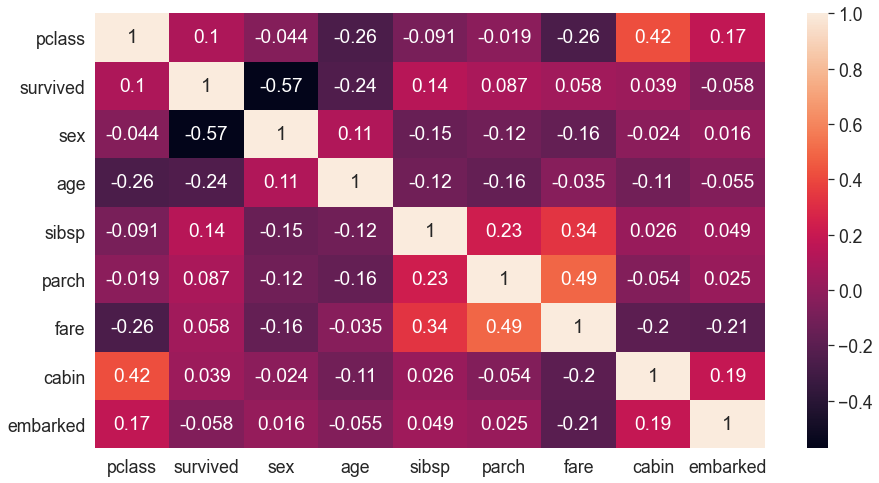

In [11]:
plot.figure(1, (15, 8))
sb.heatmap(df.corr(), annot=True)

## Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(["survived"], axis=1), df[["survived"]], test_size=0.2)

## Building the Decision Tree Calssifer

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
model = DecisionTreeClassifier(max_depth=6).fit(xtrain, ytrain)

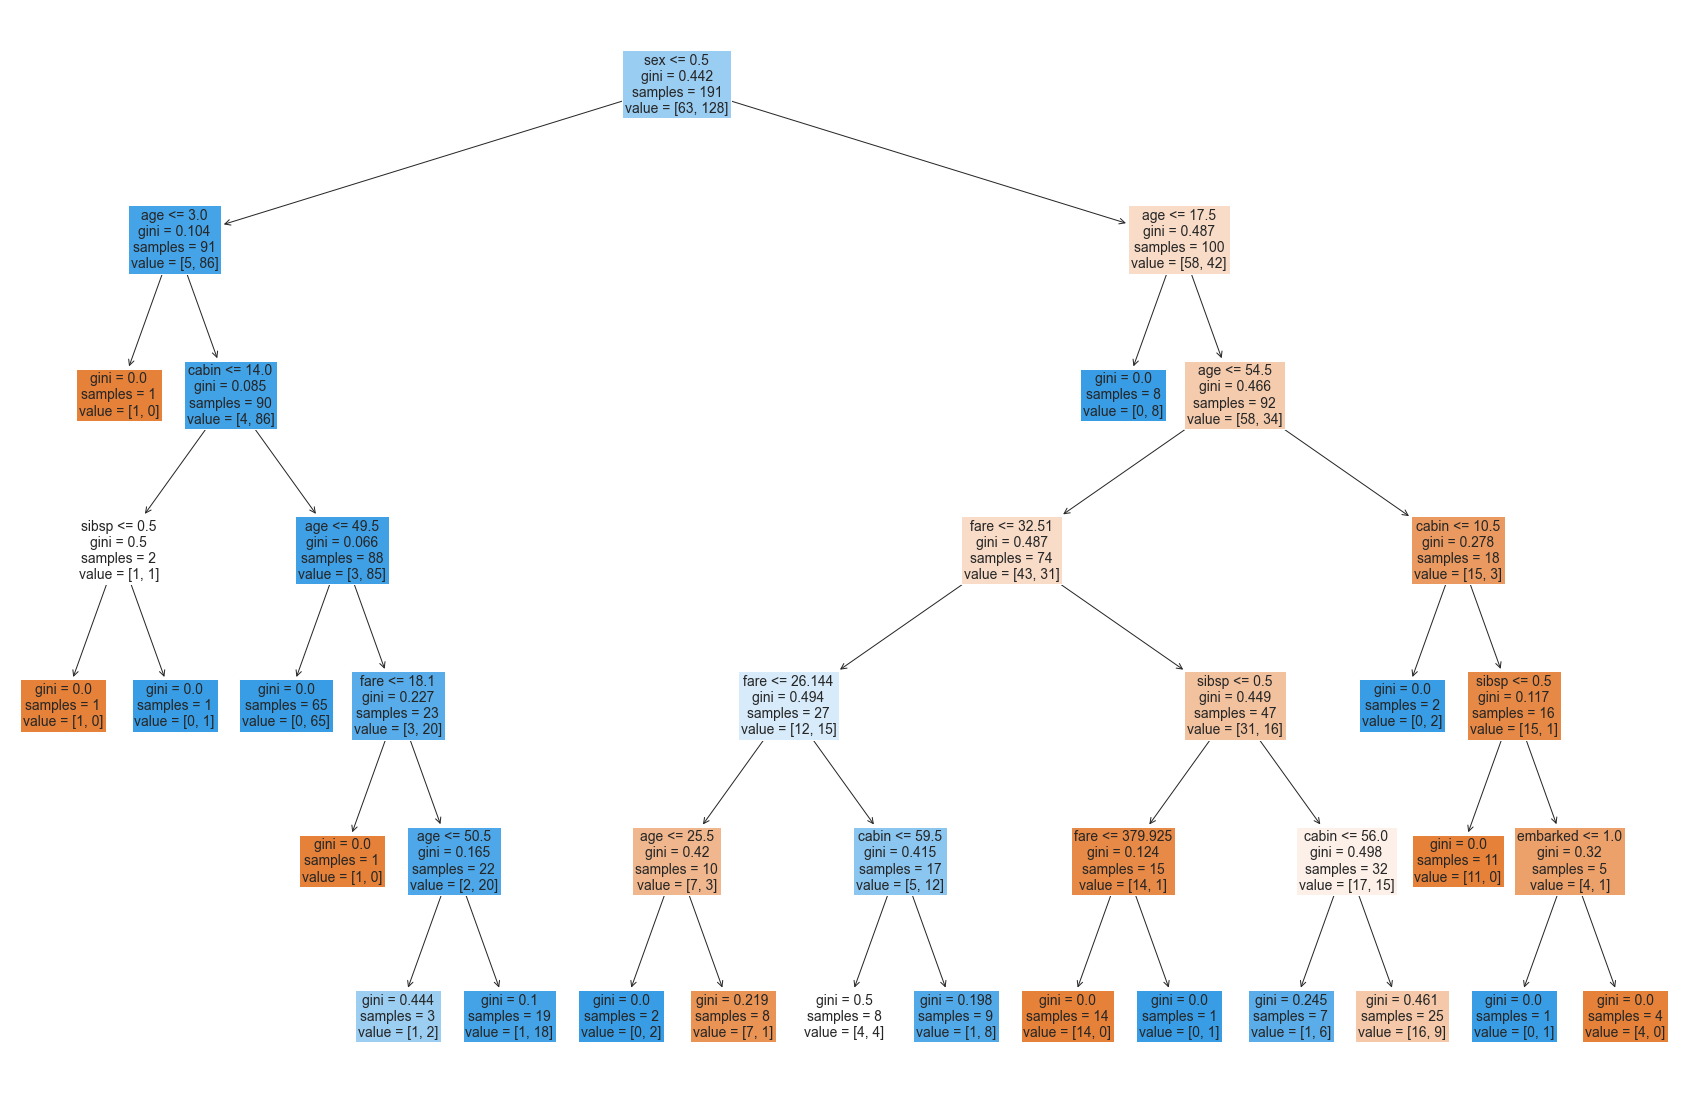

In [24]:
plot.figure(1, (30, 20))
_ = plot_tree(model,
    feature_names=xtest.columns,
    filled=True,
    # impurity=True
)

In [17]:
predictions = model.predict(xtest)

predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

## Metrics

In [18]:
from sklearn import metrics 

Classification Report

In [19]:
print(metrics.classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.81      0.83      0.82        30

    accuracy                           0.77        48
   macro avg       0.76      0.75      0.75        48
weighted avg       0.77      0.77      0.77        48



In [20]:
print(f"Accuracy: {metrics.accuracy_score(ytest, predictions)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(ytest, predictions)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(ytest, predictions)}")
print(f"R2: {metrics.r2_score(ytest, predictions)}")

Accuracy: 0.7708333333333334
Mean Absolute Error: 0.22916666666666666
Mean Squared Error: 0.22916666666666666
R2: 0.022222222222222254
